## Regression using Neural-Network, Keras API
* We can easily fit the regression data with Keras sequential model and predict the test data
    * using KerasRegressor wrapper
    * using Keras sequential model 

1. Preparing data
2. Defining the model
3. Fitting with KerasRegressor (error check and visualize results)
4. Fitting with NN - Sequential model (error check and visualize results)

In [1]:
#importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

features_shape: (220, 3)
label_shape: (220, 1)


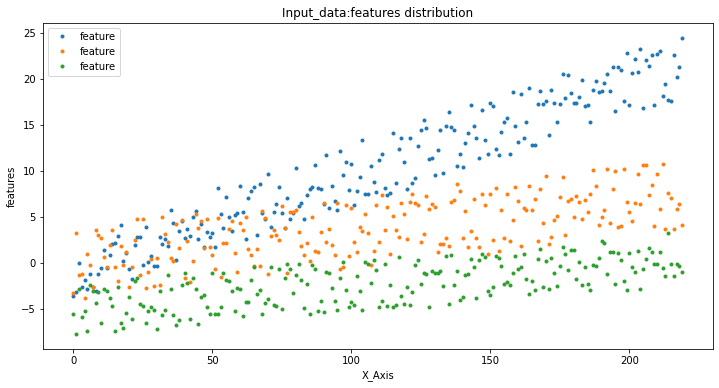

In [2]:
#Generate/Preparing data
random.seed(123)
def CreateDataset(N):
    x1,x2,x3,y = [],[],[],[]
    for i in range(N):
        xx1 = i/10+random.uniform(-4,3)
        xx2 = i/30+random.uniform(-4,4)
        xx3 = i/40+random.uniform(-3,3)-5
        yy = (xx1+xx2+xx3/2)/3
        x1.append([xx1])
        x2.append([xx2])
        x3.append([xx3])
        y.append([yy])
    return np.hstack([x1,x2,x3]), np.array(y)

N = 220
features,label = CreateDataset(N)
x_axis = range(N)

print('features_shape:',features.shape)
print('label_shape:',label.shape)

plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution')
plt.legend()
plt.show()
 

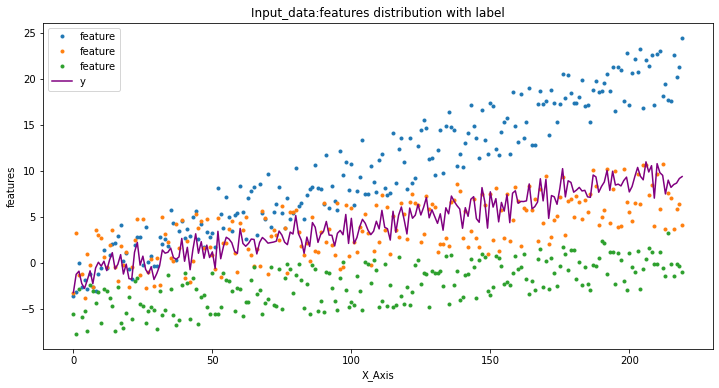

In [3]:
plt.figure(figsize=(12,6))
plt.plot(x_axis, features, 'o', label="feature", markersize=3)
plt.plot(x_axis, label, lw=1.5, color="purple", label="y")
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:features distribution with label')
plt.legend()
plt.show()
 

In [4]:
features.shape

(220, 3)

In [5]:
label.shape

(220, 1)

#### Purple-line is y output, and the remaining dots are features for x input.


In [6]:
#defining the model
#build a keras sequential model to use in KerasRegressor wrapper.

def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=3,activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(8,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model
model=BuildModel()
BuildModel().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


#### get_weights() for a Dense layer returns a list of two elements:
* the first element contains the weights, and 
* the second element contains the biases. So you can simply do:


In [7]:
weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]

In [8]:
weights.shape

(128, 32)

In [9]:
biases.shape

(32,)

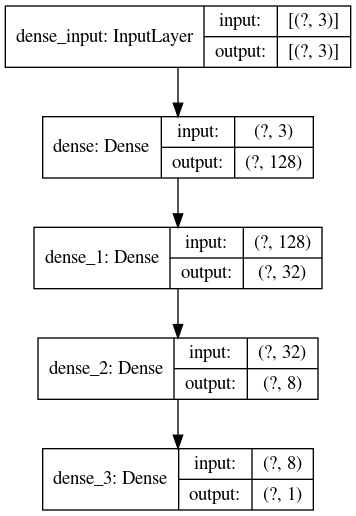

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

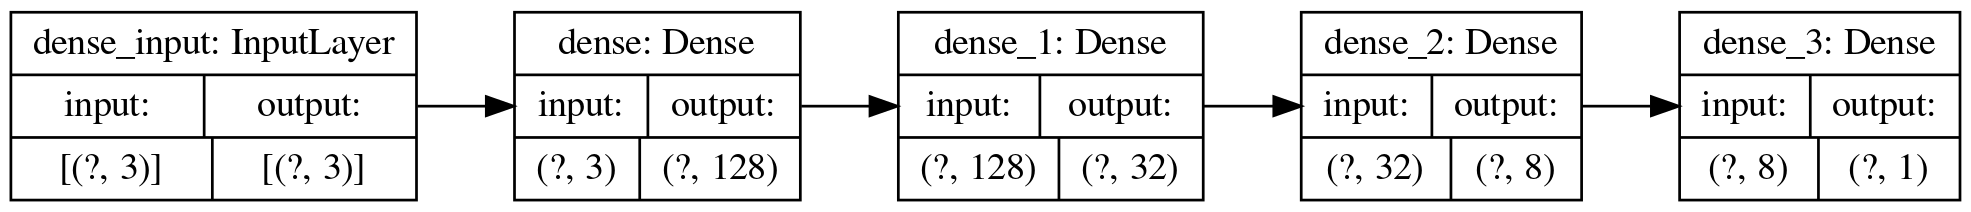

In [11]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    #show_dtype=True,
    show_layer_names=True,
    rankdir="LR", #'TB' creates a vertical plot; 'LR' creates a horizontal plot.
    expand_nested=True,
    dpi=196,
)

74/74 [==============================] - 0s 1ms/step - loss: 1.8115
mse of keras_regrerssor: 0.1311306522660529


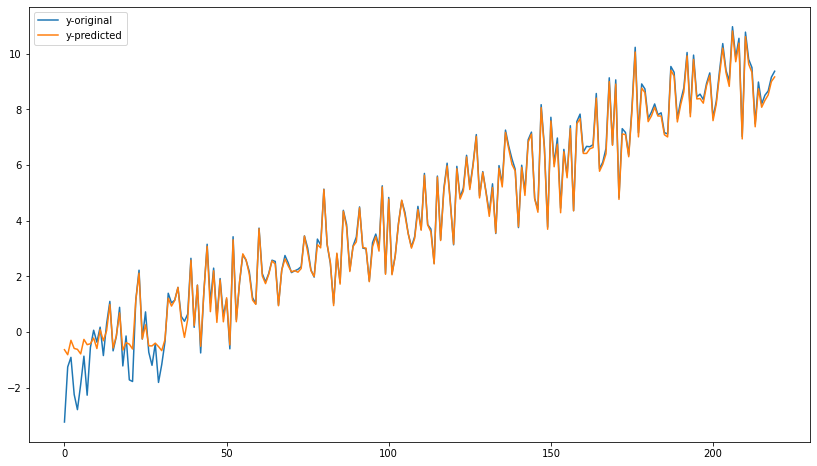

In [12]:
#fitting with KerasRegressor
#include the above model into KerasRegressor and fit model with x and y data. then, we can predict x data
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(features,label) 

y_pred = regressor.predict(features)
 
#check the mean_squared_error
mse_kr = mean_squared_error(label, y_pred)
print('mse of keras_regrerssor:',mse_kr)
 
#plot the results
plt.figure(figsize=(14,8))
plt.plot(label, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

In [13]:
#fitting with keras sequential model
#model without a wrapper
model = BuildModel()
model.fit(features, label, epochs=80, verbose=1)

Epoch 1/80
7/7 [==============================] - 0s 1ms/step - loss: 11.0027
Epoch 2/80
7/7 [==============================] - 0s 1ms/step - loss: 2.6292
Epoch 3/80
7/7 [==============================] - 0s 2ms/step - loss: 0.5994
Epoch 4/80
7/7 [==============================] - 0s 2ms/step - loss: 0.6500
Epoch 5/80
7/7 [==============================] - 0s 2ms/step - loss: 0.2490
Epoch 6/80
7/7 [==============================] - 0s 2ms/step - loss: 0.2107
Epoch 7/80
7/7 [==============================] - 0s 2ms/step - loss: 0.1225
Epoch 8/80
7/7 [==============================] - 0s 2ms/step - loss: 0.0936
Epoch 9/80
7/7 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 10/80
7/7 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 11/80
7/7 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 12/80
7/7 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 13/80
7/7 [==============================] - 0s 2ms/step - loss: 0

mse of keras_sequential/NN_model: 0.0004182716499998432


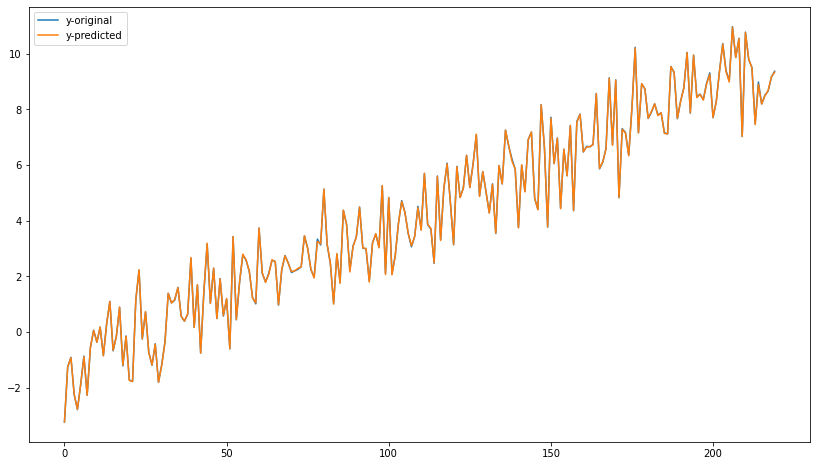

In [14]:
#prediction
y_model = model.predict(features)

#check a mean_squared_error
mse_model=mean_squared_error(label, y_model)
print('mse of keras_sequential/NN_model:',mse_model)
 
#plot the results
plt.figure(figsize=(14,8))
plt.plot(label, label="y-original")
plt.plot(y_model, label="y-predicted")
plt.legend()
plt.show()

## Multi-output Regression using Keras Sequential Model
#### - Multi-output regression data contains more than one output value for given input data

1. Preparing the data
2. Defining the model
3. Predicting and visualizing the result

In [15]:
#import libraries
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

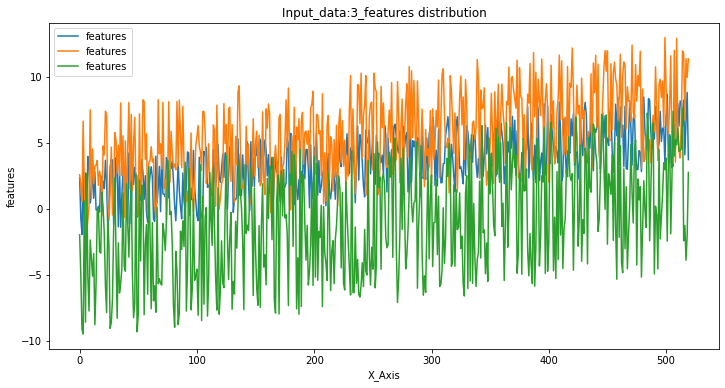

In [16]:
#preparing the data
def create_data(n):
    x1 = array([i/100+uniform(-2,4) for i in range(n)]).reshape(n,1)
    x2 = array([i/100+uniform(-4,6)+2 for i in range(n)]).reshape(n,1)
    x3 = array([i/100+uniform(-7,6)-3 for i in range(n)]).reshape(n,1)
    
    y1= [x1[i]-x2[i]+x3[i]+uniform(-3,3) for i in range(n)]
    y2= [x1[i]+x2[i]-x3[i]+5+uniform(-2,4) for i in range(n)]
    
    X = hstack((x1, x2, x3))
    Y = hstack((y1, y2))
    return X, Y

n=520
x_features, y_labels = create_data(n)
xaxis=range(n)

#plotting x_features
plt.figure(figsize=(12,6))
plt.plot(xaxis, x_features, label="features", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('features')
plt.title('Input_data:3_features distribution')
plt.legend()
plt.show()

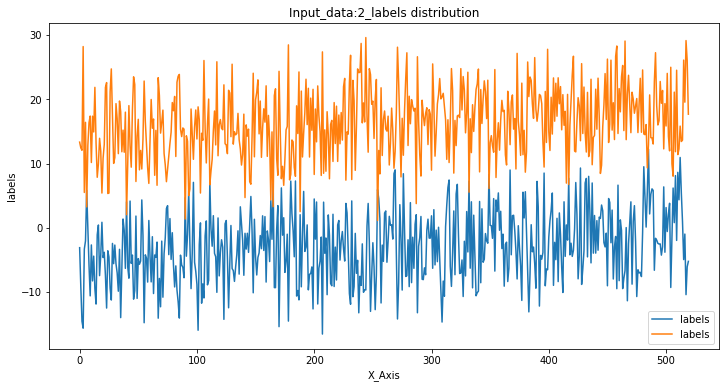

In [17]:
#plotting y_labels
plt.figure(figsize=(12,6))
plt.plot(xaxis, y_labels, label="labels", markersize=3)
plt.xlabel('X_Axis')
plt.ylabel('labels')
plt.title('Input_data:2_labels distribution')
plt.legend()
plt.show()

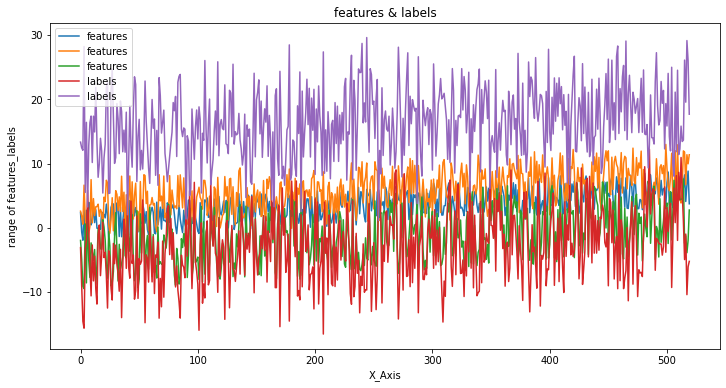

In [18]:
#plotting x_features
plt.figure(figsize=(12,6))
plt.plot(xaxis, x_features, label="features", markersize=3)
plt.plot(xaxis, y_labels, label="labels", markersize=2)
plt.xlabel('X_Axis')
plt.ylabel('range of features_labels')
plt.title('features & labels')
plt.legend()
plt.show()

In [19]:
print("x_features:", x_features.shape, "y_labels:", y_labels.shape)
 
in_dim = x_features.shape[1]
out_dim = y_labels.shape[1]

xtrain, xtest, ytrain, ytest=train_test_split(x_features, y_labels, test_size=0.20)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

x_features: (520, 3) y_labels: (520, 2)
(416, 3)
(416, 2)
(104, 3)
(104, 2)


In [20]:
import tensorflow as tf
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))
model.add(Dense(2))
model.compile(optimizer='adam', loss=tf.keras.losses.LogCosh(), metrics='mse')
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 6         
Total params: 5,208
Trainable params: 5,208
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=1)

Epoch 1/100
35/35 [==============================] - 0s 2ms/step - loss: 8.4417 - mse: 113.3888
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 4.1927 - mse: 39.7504
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 1.7315 - mse: 8.5250
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 1.2188 - mse: 4.7133
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 1.1418 - mse: 4.2477
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 1.1143 - mse: 4.0633
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 1.1023 - mse: 3.9685
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 1.0502 - mse: 3.7367
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 1.1323 - mse: 4.1356
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 1.0758 - mse: 3.8653
Epoch 11/100
35/35 [==============================] - 0s

35/35 [==============================] - 0s 2ms/step - loss: 0.8793 - mse: 2.9183
Epoch 88/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8707 - mse: 2.8646
Epoch 89/100
35/35 [==============================] - 0s 2ms/step - loss: 0.9024 - mse: 3.0148
Epoch 90/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8837 - mse: 2.9331
Epoch 91/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8784 - mse: 2.9026
Epoch 92/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8791 - mse: 2.9069
Epoch 93/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8936 - mse: 2.9701
Epoch 94/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8600 - mse: 2.8221
Epoch 95/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8747 - mse: 2.9149
Epoch 96/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8965 - mse: 2.9987
Epoch 97/100
35/35 [==============================] - 0s 2ms/st

In [23]:
#predicting and visualizing the result
ypred = model.predict(xtest)

In [24]:
ypred.shape

(104, 2)

In [25]:
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

mse_multioutput= mean_squared_error(ytest, ypred)
print('mse_multioutput:', mse_multioutput)

y1 MSE:3.3411
y2 MSE:3.4491
mse_multioutput: 3.3950704121843946


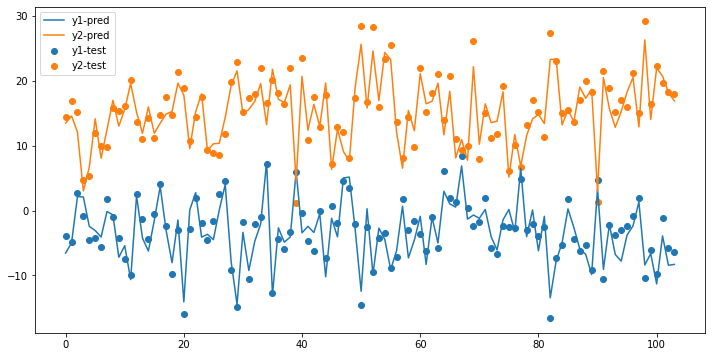

In [26]:
#plotting ground_truth vs predictions
x_axis = range(len(xtest))

plt.figure(figsize=(12,6))
plt.scatter(x_axis, ytest[:,0], label="y1-test")
plt.plot(x_axis, ypred[:,0], label="y1-pred")
plt.scatter(x_axis, ytest[:,1], label="y2-test")
plt.plot(x_axis, ypred[:,1],label="y2-pred")
plt.legend()
plt.show()

### Take-home-points:

* Use the ADAM optimizer
* ReLU and it's types (i.e. LeakyReLu, PReLu, etc... are the best nonlinearity (activation function)
* DO add a bias in every layer
* Do NOT use an activation function at output layer
* Whiten (normalize) input data
* Scale input data in a way that reasonably preserves its dynamic range